<h2>Converting annotations to mask
    

In [5]:
# import functions
from labelme2coco import get_coco_from_labelme_folder, save_json

# set labelme training data directory
labelme_folder = "infer_cement"

# set path for coco json to be saved
export_dir = "./"

# create train coco object
train_coco = get_coco_from_labelme_folder(labelme_folder)

# export train coco json
save_json(train_coco.json, export_dir+"predictions.json")

There are 6 listed files in folder infer_cement.


Converting labelme annotations to COCO format: 100%|██████████| 6/6 [00:00<00:00, 44.70it/s]


In [6]:
from pycocotools.coco import COCO
import os
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


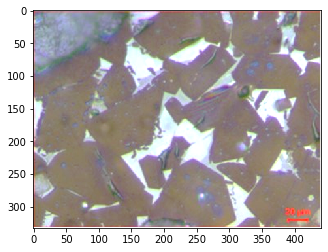

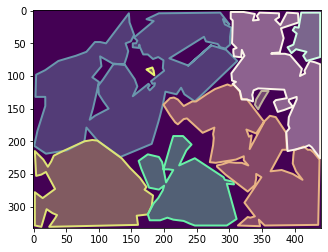

(array([0., 1., 2.]), array([ 37048, 109767,     38])) (array([0.]), array([146853]))


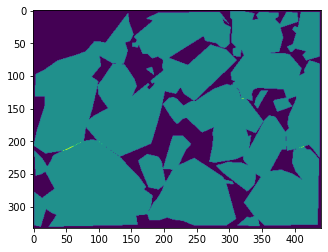

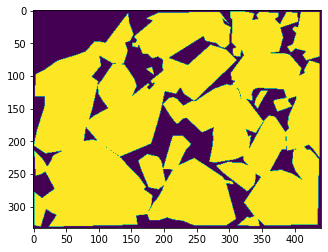

In [7]:
coco = COCO('./predictions.json')
mas = []
mbs = []
img_dir = './infer_cement'

for image_id in [2]:#coco.imgs.keys():
# image_id = 5

    img = coco.imgs[image_id]
    idxx = img['file_name'].split('_')[1][:-4]
    image = np.array(Image.open(os.path.join(img_dir, img['file_name'])))
    plt.imshow(image, interpolation='nearest')
    plt.show()
    
    
    plt.imshow(image)
    cat_ids = coco.getCatIds()
    anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
    anns = coco.loadAnns(anns_ids)
    coco.showAnns(anns)
    
    maskbelite  = np.zeros((image.shape[0],image.shape[1]))
    maskalite  = np.zeros((image.shape[0],image.shape[1]))

    for i in range(len(anns)):
        if anns[i]['category_id'] == 0:
            maskbelite += coco.annToMask(anns[i])
            mbs.append(coco.annToMask(anns[i]))
        if anns[i]['category_id'] == 1:
            maskalite += coco.annToMask(anns[i])
            mas.append(coco.annToMask(anns[i]))
        # plt.imshow(coco.annToMask(anns[i]))

        # plt.show()
    # maskbelite = 51*maskbelite
    plt.imshow(maskbelite)
    plt.show()
    plt.imshow(maskalite)
    
    print(np.unique(maskalite, return_counts=True), np.unique(maskbelite, return_counts=True))
    
    plt.imshow(maskbelite)
    np.unique(maskbelite, return_counts=True)
    
    
    img = maskbelite
    img[img == 2] = 1
    img = img*[img==1][0]

    plt.imshow(img)
    np.save(f'./masks/fig_{idxx}_belite.npy',img)
    
    plt.imshow(maskalite)
    img = maskalite
    img[img == 2] = 1
    img = img*[img==1][0]
    plt.show()
    plt.imshow(img)
    np.save(f'./masks/fig_{idxx}_alite.npy',img)
    break